# Plotting BO results for different sampling strategies, embedding types, and number of warm-up initial data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from visualize import *

In [3]:
traj = get_trajectory('morgan', 'random', '20')
traj.shape

morgan, random, 20 non-complete seeds: 0


(10, 50)

morgan, random, 20 non-complete seeds: 0


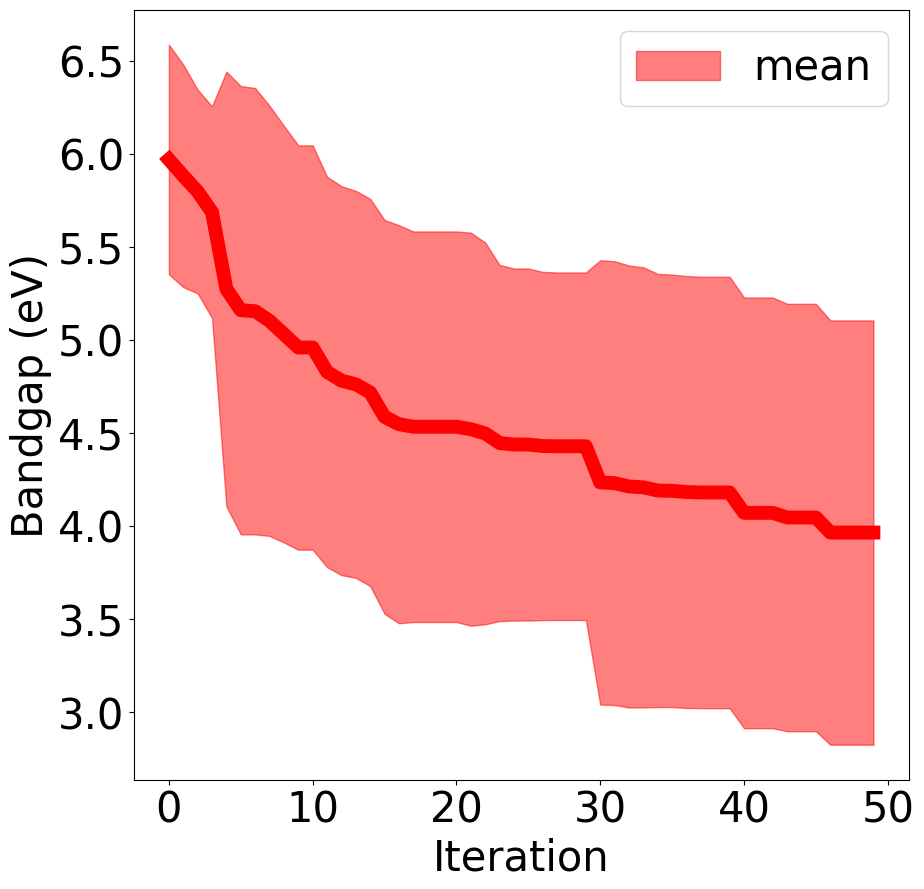

molformer, random, 20 non-complete seeds: 0


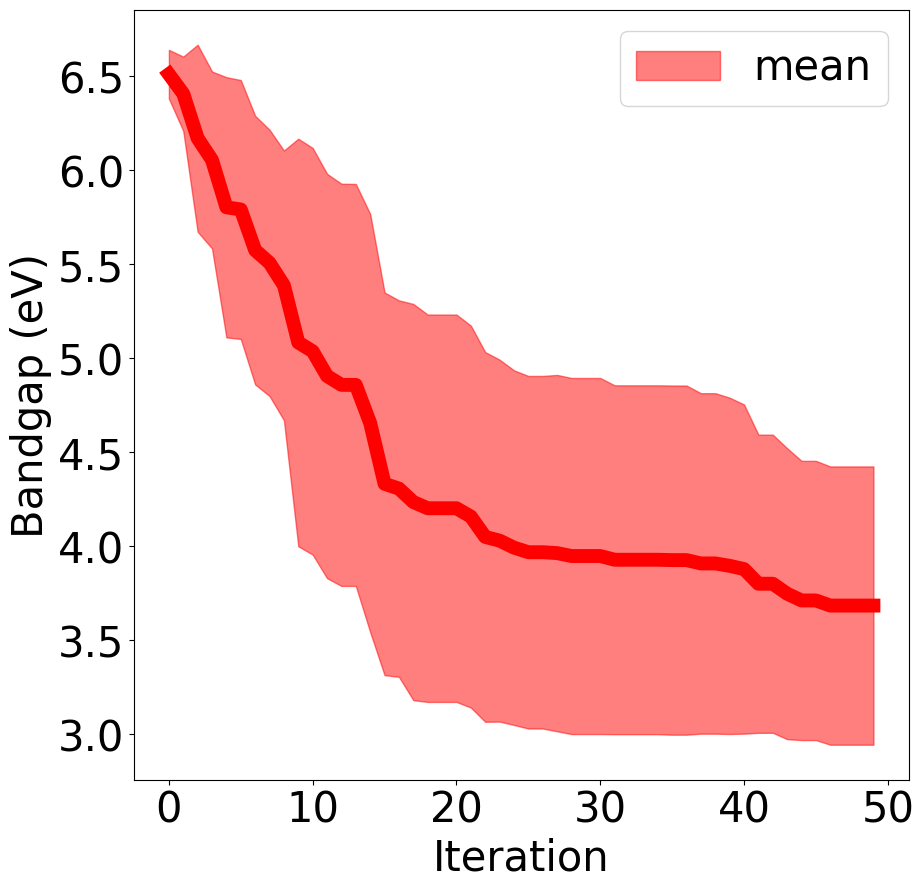

In [4]:
def plot_mean_trajectory(feat_type, split, n_sample):

    traj = get_trajectory(feat_type, split, n_sample)

    plt.figure(figsize=(10,10))
    yerr = traj.std(0)
    plt.fill_between(range(50), traj.mean(0)-yerr, traj.mean(0) + yerr,label = 'mean', color = 'red', alpha = 0.5)
    plt.plot(range(50), traj.mean(0), color = 'red', linewidth = 10)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel('Iteration', fontsize=30)
    plt.ylabel('Bandgap (eV)', fontsize=30)
    plt.legend(fontsize=30)
    plt.show()

plot_mean_trajectory('morgan', 'random', '20')
plot_mean_trajectory('molformer', 'random', '20')

# comparing warm up 

In [40]:
all_trajs = {
    'morgan-stratified': [],
    'morgan-random': [],
    'molformer-stratified': [],
    'molformer-random': []
}
all_warmup = [5, 10, 20, 50, 100, 200]

for feat_type in ['morgan', 'molformer']:
    for split in ['random', 'stratified']:
        for n_sample in all_warmup:
            traj = get_trajectory(feat_type, split, n_sample)
            all_trajs[f"{feat_type}-{split}"].append(traj)

morgan, random, 5 non-complete seeds: 1
morgan, random, 10 non-complete seeds: 0
morgan, random, 20 non-complete seeds: 0
morgan, random, 50 non-complete seeds: 0
morgan, random, 100 non-complete seeds: 0
morgan, random, 200 non-complete seeds: 0
morgan, stratified, 5 non-complete seeds: 0
morgan, stratified, 10 non-complete seeds: 0
morgan, stratified, 20 non-complete seeds: 0
morgan, stratified, 50 non-complete seeds: 0
morgan, stratified, 100 non-complete seeds: 0
morgan, stratified, 200 non-complete seeds: 0
molformer, random, 5 non-complete seeds: 0
molformer, random, 10 non-complete seeds: 0
molformer, random, 20 non-complete seeds: 0
molformer, random, 50 non-complete seeds: 0
molformer, random, 100 non-complete seeds: 0
molformer, random, 200 non-complete seeds: 0
molformer, stratified, 5 non-complete seeds: 0
molformer, stratified, 10 non-complete seeds: 0
molformer, stratified, 20 non-complete seeds: 0
molformer, stratified, 50 non-complete seeds: 0
molformer, stratified, 100

In [41]:
import pickle
filename = 'all_combi_trajs.pkl'
with open(filename, 'wb') as file:
    pickle.dump(all_trajs, file)

In [2]:
import pickle
filename = 'all_combi_trajs.pkl'
with open(filename, 'rb') as file:
    all_trajs = pickle.load(file)

In [4]:
all_trajs.keys()

dict_keys(['morgan-stratified', 'morgan-random', 'molformer-stratified', 'molformer-random'])

In [48]:
len(all_trajs["morgan-stratified"])

6

In [50]:
all_trajs.keys()

dict_keys(['morgan-stratified', 'morgan-random', 'molformer-stratified', 'molformer-random'])

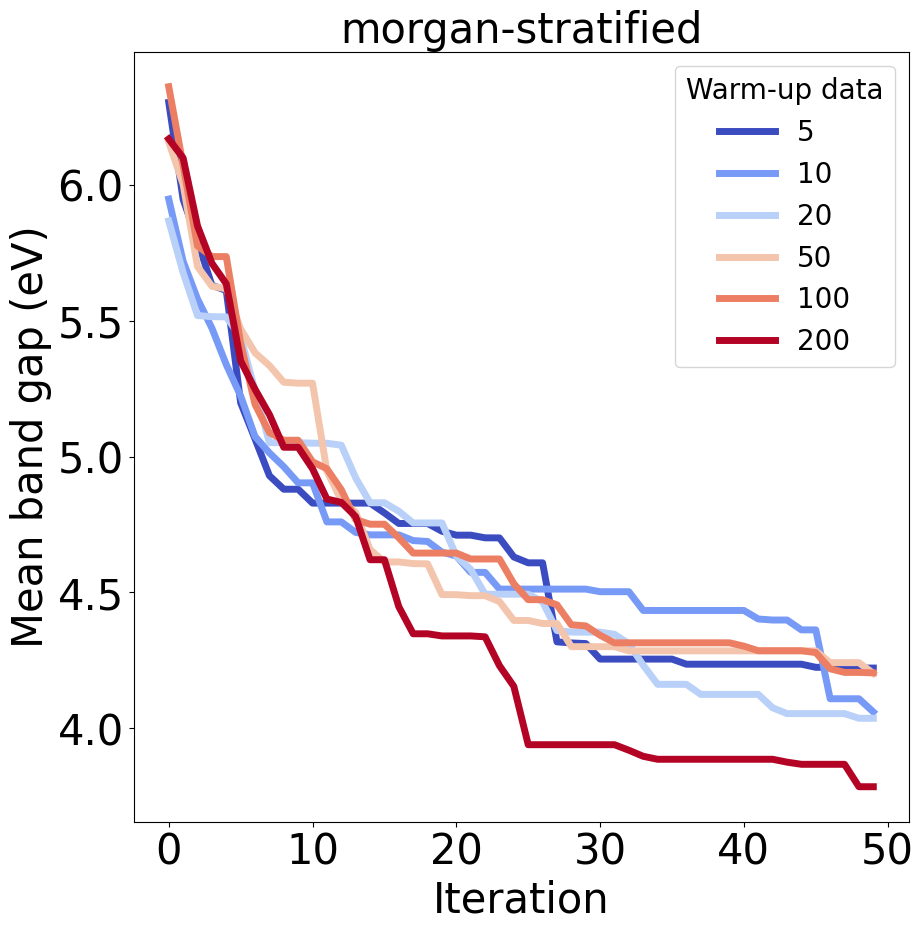

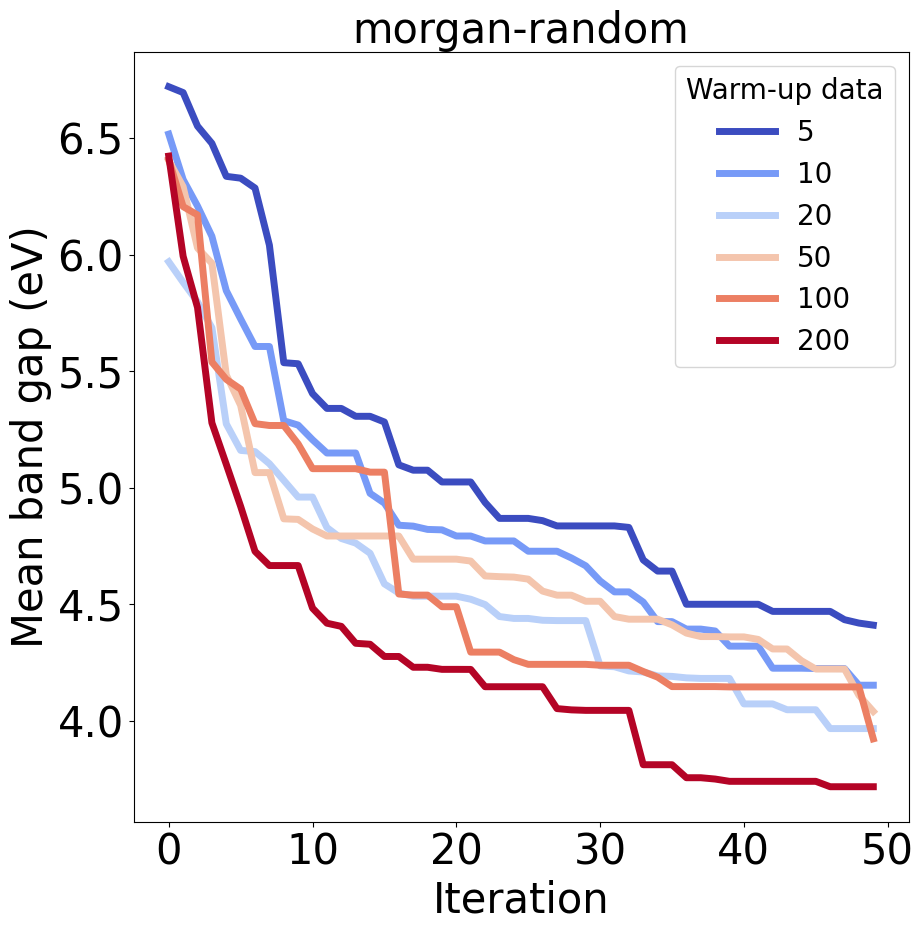

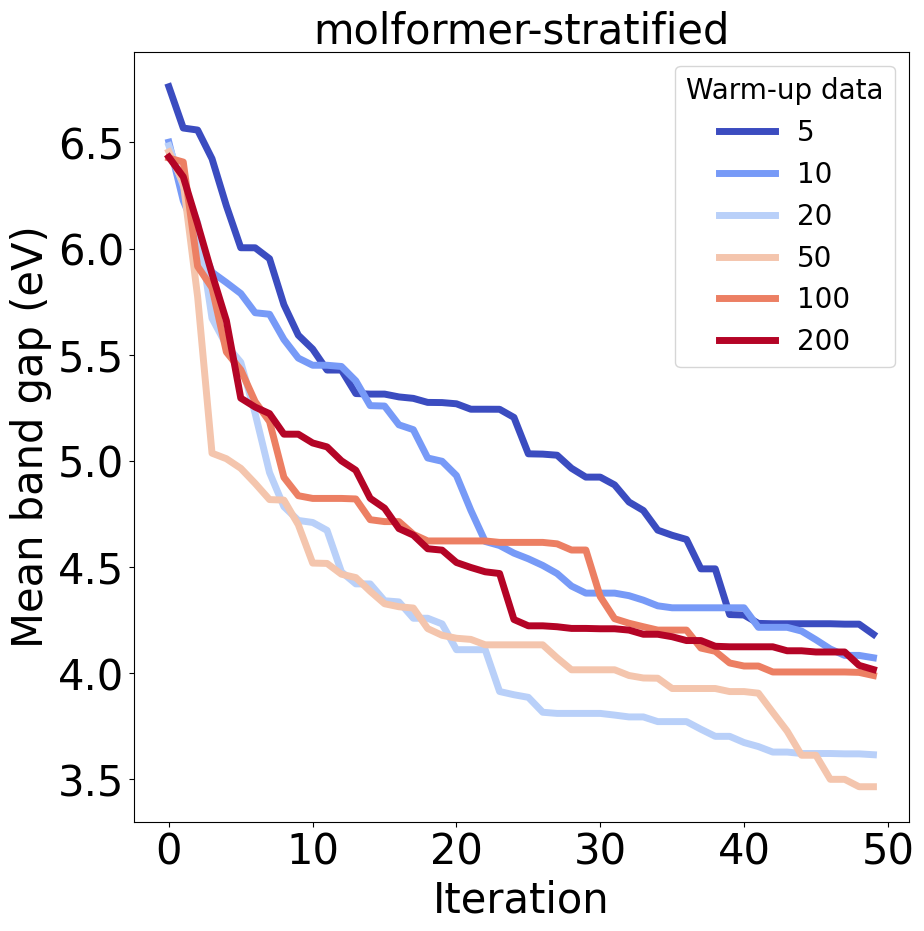

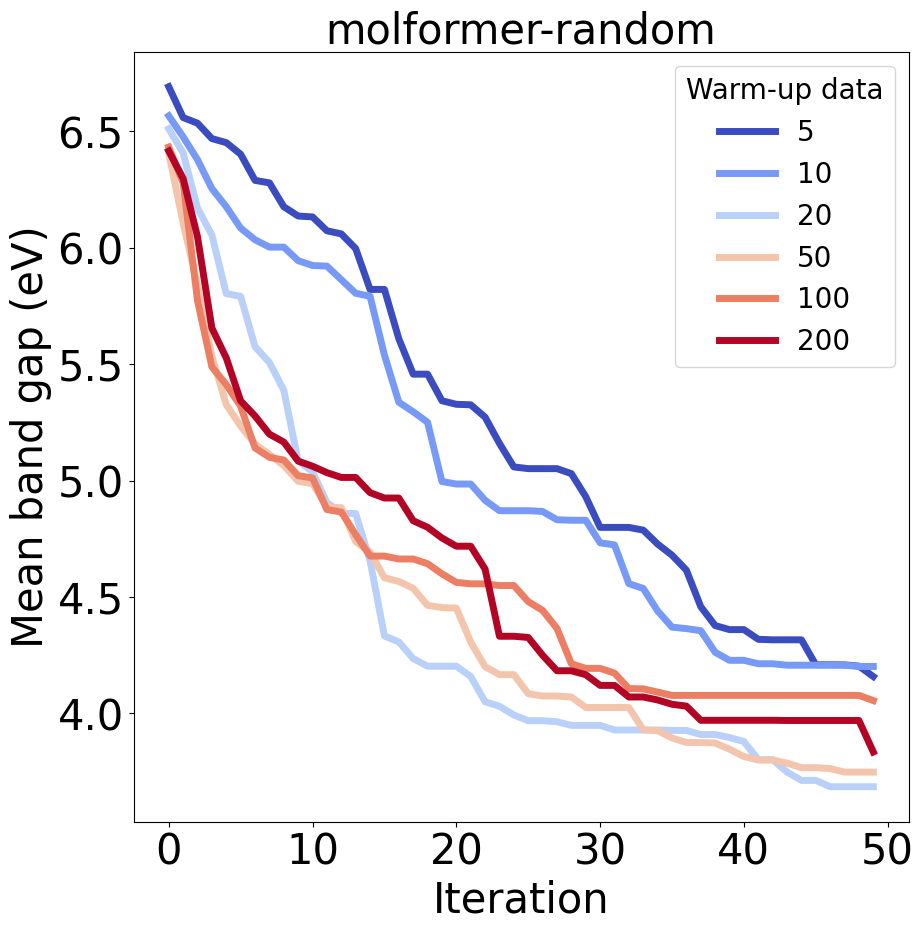

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

all_warmup = [5, 10, 20, 50, 100, 200]
for selected_combi in all_trajs.keys():
    current_trajs = all_trajs[selected_combi]
    
    plt.figure(figsize=(10,10))
    cmap = plt.get_cmap('coolwarm')
    norm = LogNorm(vmin=min(all_warmup), vmax=max(all_warmup))

    for i, traj in enumerate(current_trajs):
        color = cmap(norm(all_warmup[i]))
        plt.plot(range(50), traj.mean(0), linewidth=5, label=all_warmup[i], color=color)

    plt.title(selected_combi, fontsize = 30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel('Iteration', fontsize=30)
    plt.ylabel('Mean band gap (eV)', fontsize=30)
    plt.legend(title="Warm-up data", fontsize=20, title_fontsize=20)
    plt.savefig(f"figures/{selected_combi}.png")
    plt.show()

In [53]:
current_trajs = all_trajs[selected_combi]

In [52]:
for selected_combi in all_trajs.keys():
    print(selected_combi)

morgan-stratified
morgan-random
molformer-stratified
molformer-random


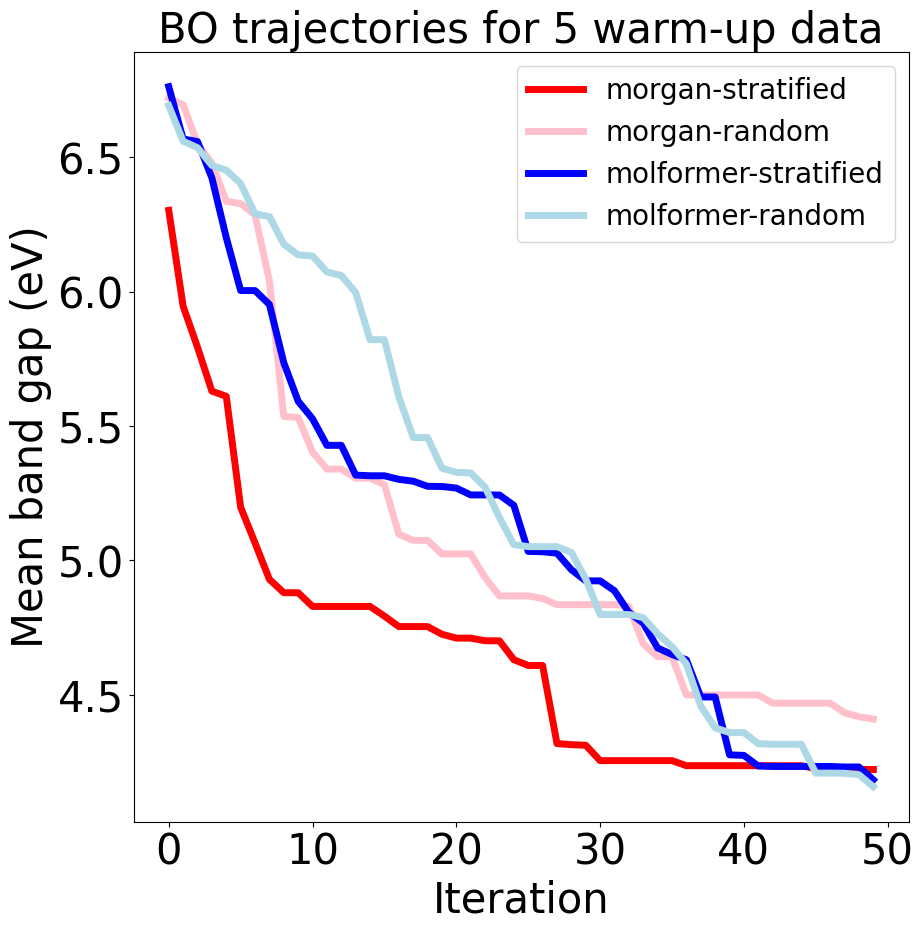

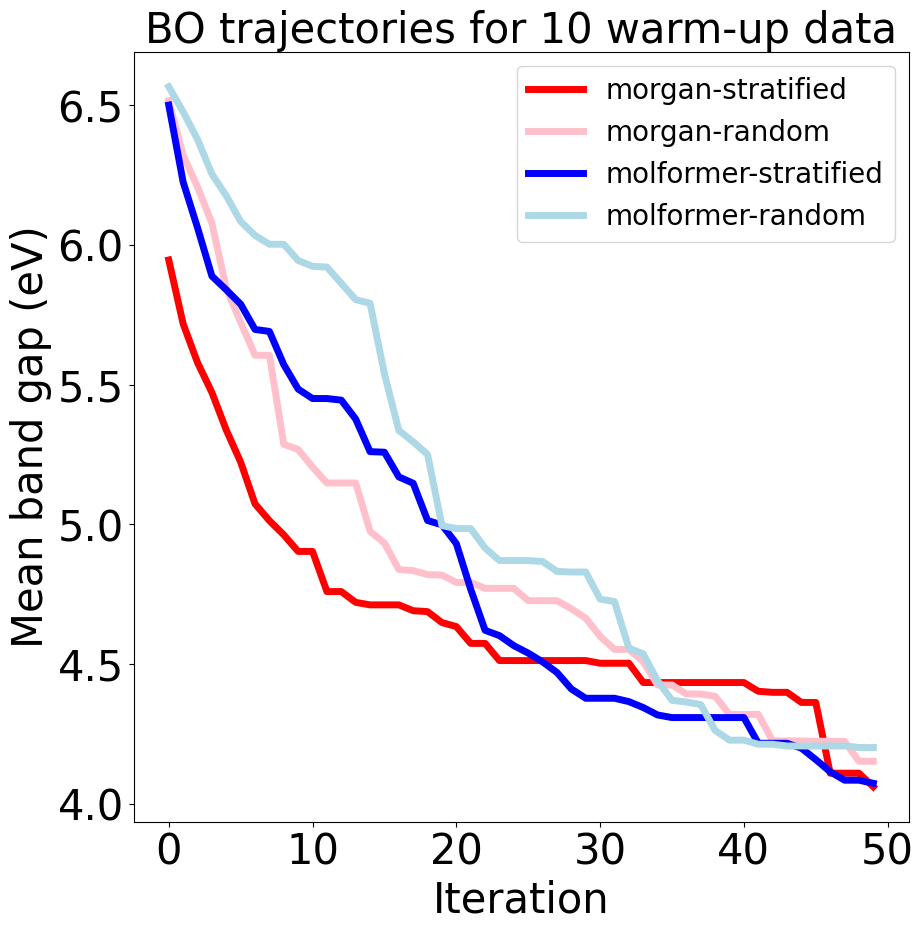

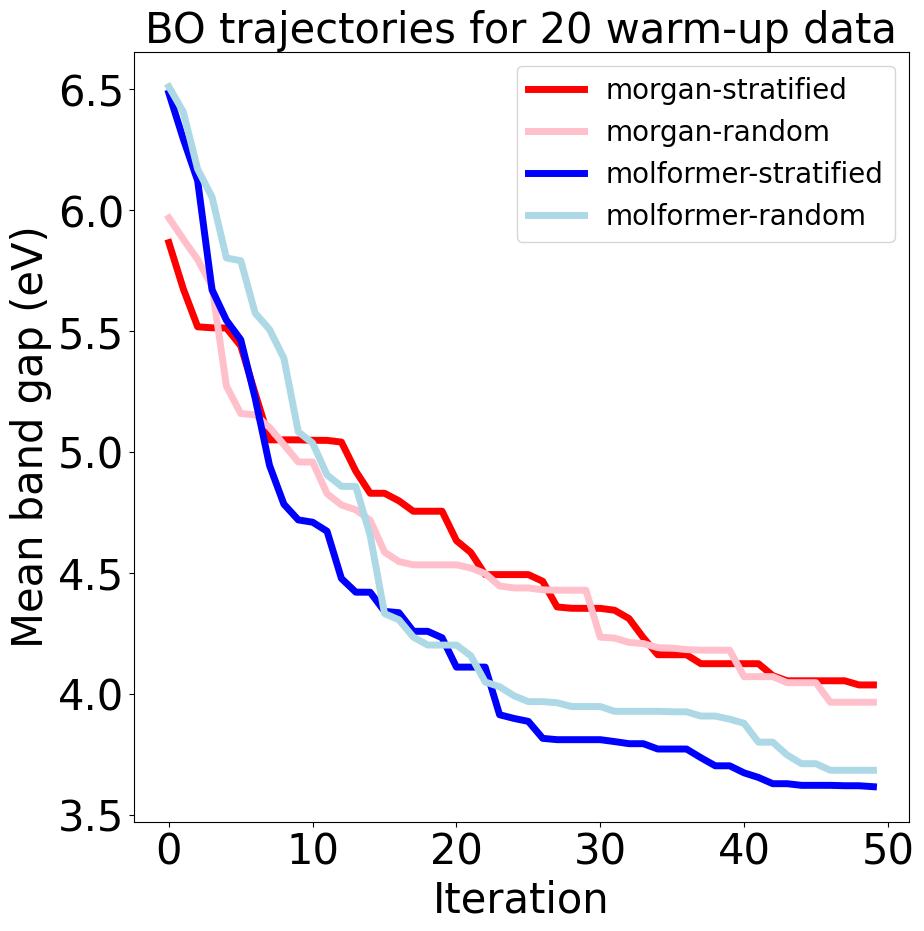

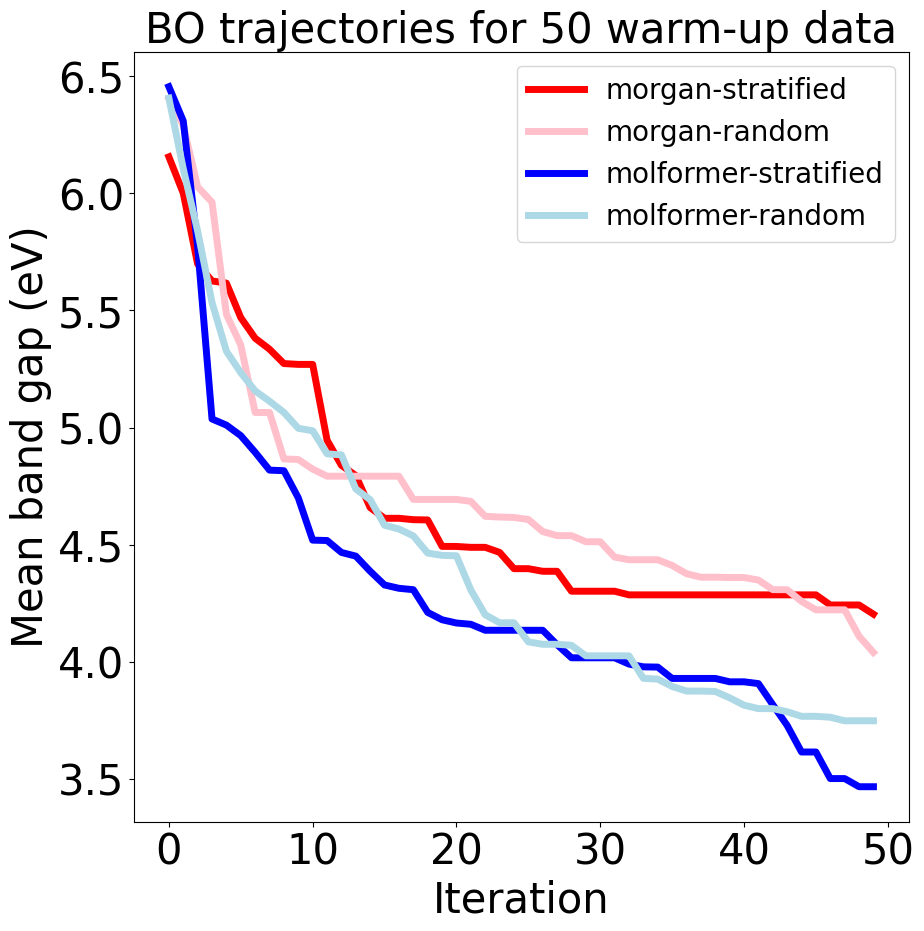

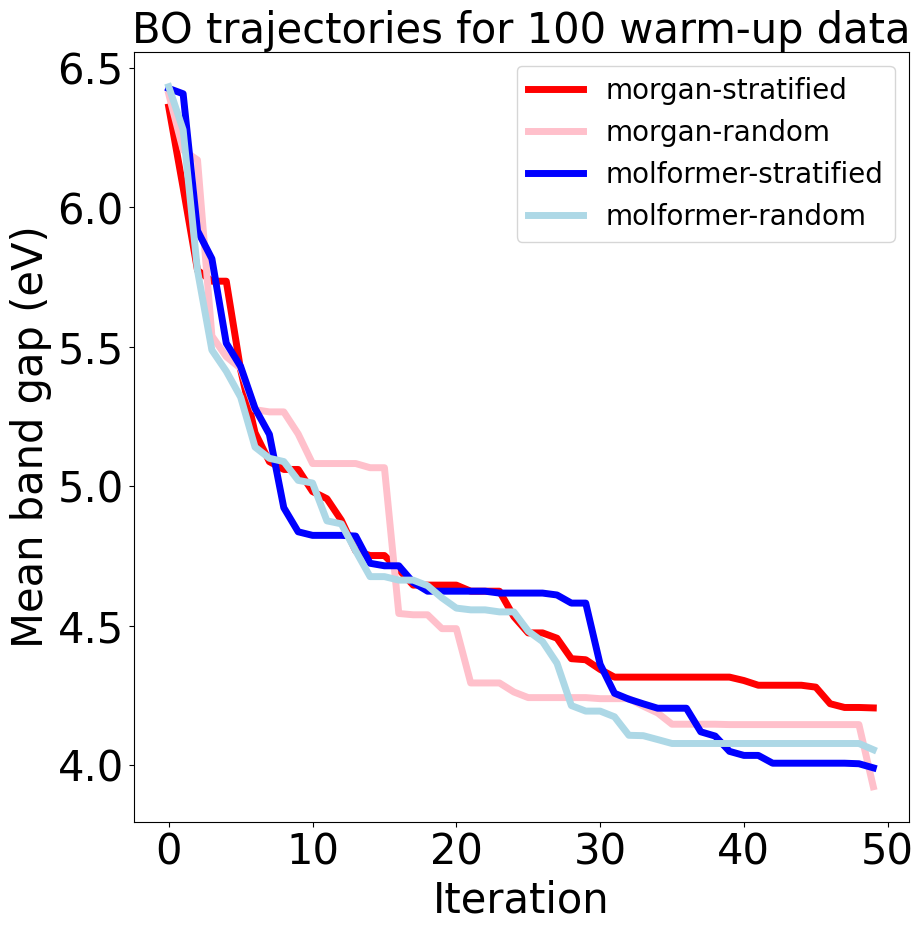

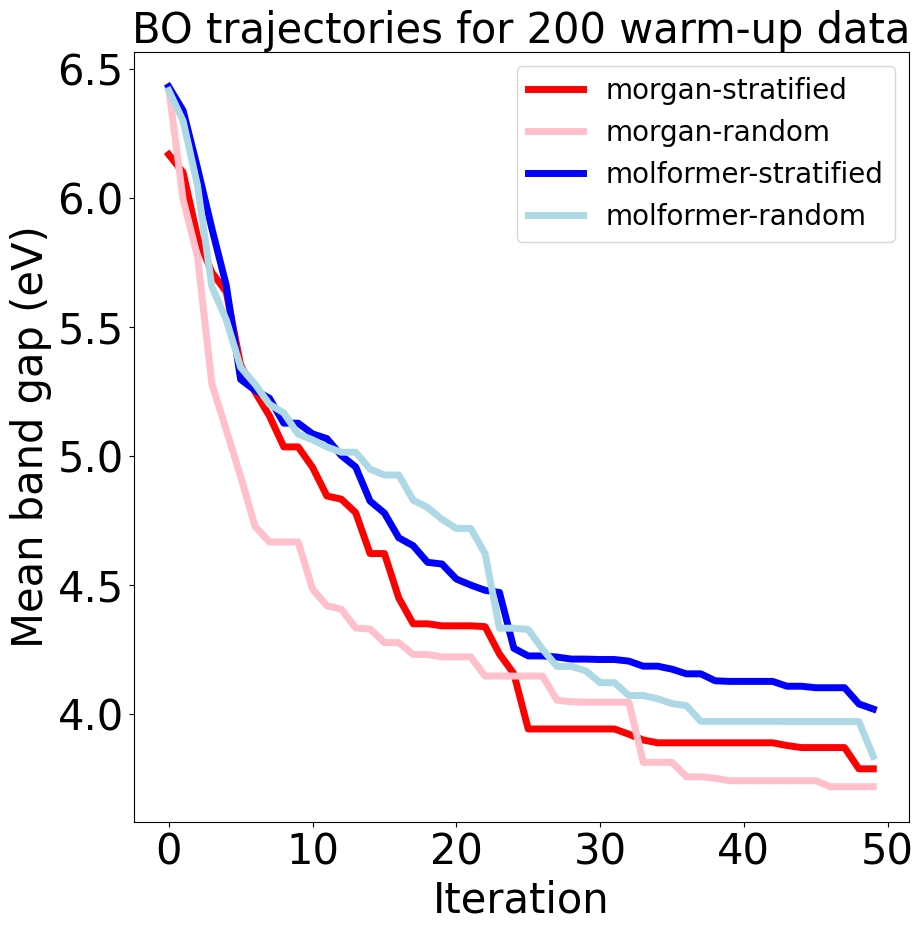

In [11]:
all_warmup = [5, 10, 20, 50, 100, 200]
colors = ['red', 'pink',  'blue', 'lightblue' ]

for warmup in all_warmup:
    widx = all_warmup.index(warmup)
    plt.figure(figsize=(10,10))
    for i, selected_combi in enumerate(all_trajs.keys()):
        traj = all_trajs[selected_combi][widx]
        plt.plot(range(50), traj.mean(0), linewidth=5, label=selected_combi, color = colors[i])

    plt.title(f"BO trajectories for {warmup} warm-up data", fontsize = 30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel('Iteration', fontsize=30)
    plt.ylabel('Mean band gap (eV)', fontsize=30)
    plt.legend(fontsize=20, title_fontsize=20)
    plt.savefig(f"figures/traj_warmup{warmup}.png")
    plt.show()